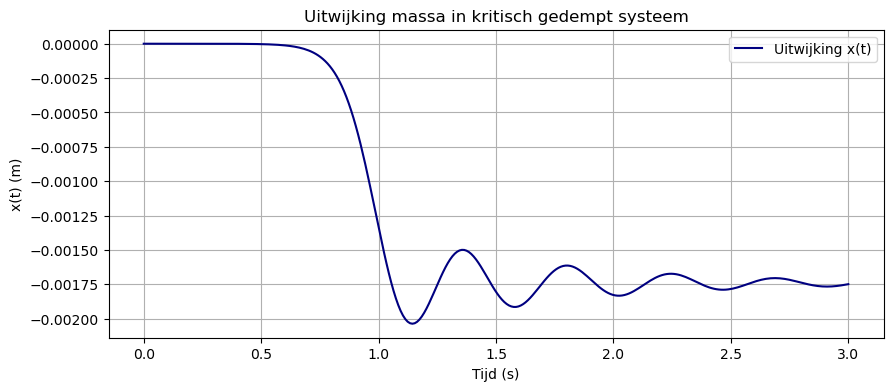

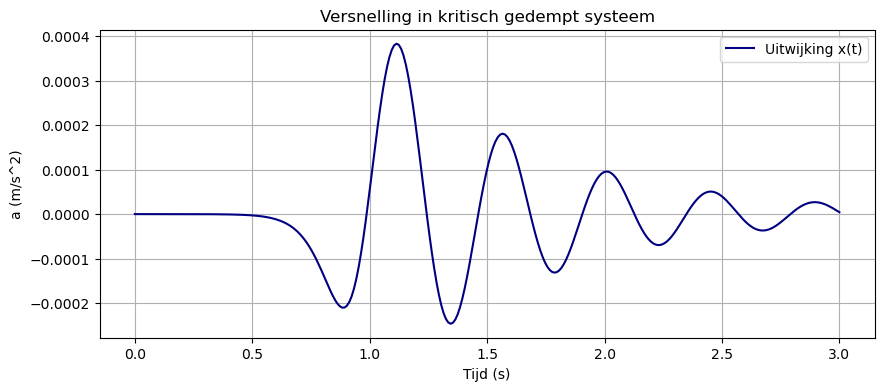

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

m = 0.05            # massa (kg)
k = 10            # veerconstante (N/m)
c = 0.2 * np.sqrt(k * m)  # kritische demping
x0 = 0.0            # beginuitwijking
v0 = 0.0            # beginsnelheid


data = pd.read_csv('versnellingsprofiel_glad.csv', comment='#', header=None)
data.columns = ['tijd', 'versnelling']

tijd = data['tijd'].values
a_in = data['versnelling'].values
dt = tijd[1] - tijd[0]
N = len(tijd)


x = np.zeros(N)
v = np.zeros(N)
a_sens = np.zeros(N)

# BEGINWAARDEN
x[0] = x0
v[0] = v0

# ====== NUMERIEKE OPLOSSING (EULER-INTEGRATIE) ======
for i in range(N - 1):
    F_in = -m * a_in[i]  # Inertiële kracht werkt als aandrijving op massa
    a_sens[i] = (F_in - c * v[i] - k * x[i]) / m
    v[i + 1] = v[i] + dt * a_sens[i]
    x[i + 1] = x[i] + dt * v[i + 1]

# Laatste versnelling invullen
F_in_last = -m * a_in[-1]
a_sens[-1] = (F_in_last - c * v[-1] - k * x[-1]) / m

# ====== PLOTTEN ======
plt.figure(figsize=(10, 4))
plt.plot(tijd, x, label='Uitwijking x(t)', color='navy')
plt.xlabel('Tijd (s)')
plt.ylabel('x(t) (m)')
plt.title('Uitwijking massa in kritisch gedempt systeem')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 4))
plt.plot(tijd, a_sens*m/k, label='Uitwijking x(t)', color='navy')
plt.xlabel('Tijd (s)')
plt.ylabel('a (m/s^2)')
plt.title('Versnelling in kritisch gedempt systeem')
plt.grid(True)
plt.legend()

plt.show()